# Project - Parkinson's Disease Prediction from Voice Recording 

### Author : Ashish Johnson

### Data Description and Context : 

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased. <br/>
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

### Domain :

Medicine

### Attribute Information :

<b>name </b>- ASCII subject name and recording number <br/>
<b>MDVP:Fo(Hz) </b>- Average vocal fundamental frequency<br/>
<b>MDVP:Fhi(Hz) </b>- Maximum vocal fundamental frequency<br/>
<b>MDVP:Flo(Hz) </b>- Minimum vocal fundamental frequency<br/>
<b>MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP </b>- Several measures of variation in fundamental frequency<br/>
<b>MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA </b>- Several measures of variation in amplitude<br/>
<b>NHR, HNR </b>- Two measures of ratio of noise to tonal components in the voice<br/>
<b>Status </b>- Health status of the subject (one) - Parkinson's, (zero) - healthy<br/>
<b>RPDE, D2 </b>- Two nonlinear dynamical complexity measures<br/>
<b>DFA </b>- Signal fractal scaling exponent<br/>
<b>spread1, spread2, PPE </b>- Three nonlinear measures of fundamental frequency 

### Objective :

Goal is to classify the patients into the respective labels using the attributes from their voice recordings

### 1.1 Import the necessary libraries

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc 
from scipy import stats 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from mlxtend.classifier import StackingClassifier

%matplotlib inline
sns.set(color_codes = True)

### 1.2 Load the data-set

In [556]:
df = pd.read_csv("Data-Parkinsons.csv")

### 2.1 Lets check the shape of the data-set

In [557]:
df.shape

(195, 24)

So there are only <b>195 records (rows)</b> and <b>24 columns</b>

In [558]:
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

### 2.2 Lets look at the data type of each attribute

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [560]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

<b> There are a total of 24 attributes. 22 of these are continuous or numerical, the target attribute 'status' is of type Boolean and the attribute 'name' is categorical. </b>

### 2.3 Let's look at the 5 point summary of the attributes

In [561]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

<b>The independent attributes are measured in different scales Hz, DB, %, Absolute value(MDVP:Jitter(Abs)) .... Hence we will have to use a scaling techinque to scale different quantities of measurement. </b><br/>
<b> The count of each attribute is 195 implying there are no missing values in the data-set</b

### 2.4 Let's confirm there are no missing values

In [562]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<b>There are indeed no missing values in any of the columns of the data-set</b>

<b>Summary : </b><br/> <br/>
<b>1. There are only 195 records which is a relatively small data-set </b> <br/>
<b>2. There are a total of 24 attributes out of which 22 are continuous or numerical, the target attribute 'status' is of type Boolean and the attribute 'name' is categorical. </b> <br/>
<b>3. There are no missing values in any of the attributes in the data-set</b> </font> <br/><br/>
<b>Challenges : </b><br/> <br/>
<b>1. The independent attributes are measured in different scales and hence the data-set needs to be standardized to a common scale</b> <br/>
<b>2. Out of 195 records 147 are Positive while only 48 are negative. The data-set is heavily biased towards positive cases</b> <br/><br/>

### 3.1 Let us study the distribution of the attributes

### Univariate Analysis

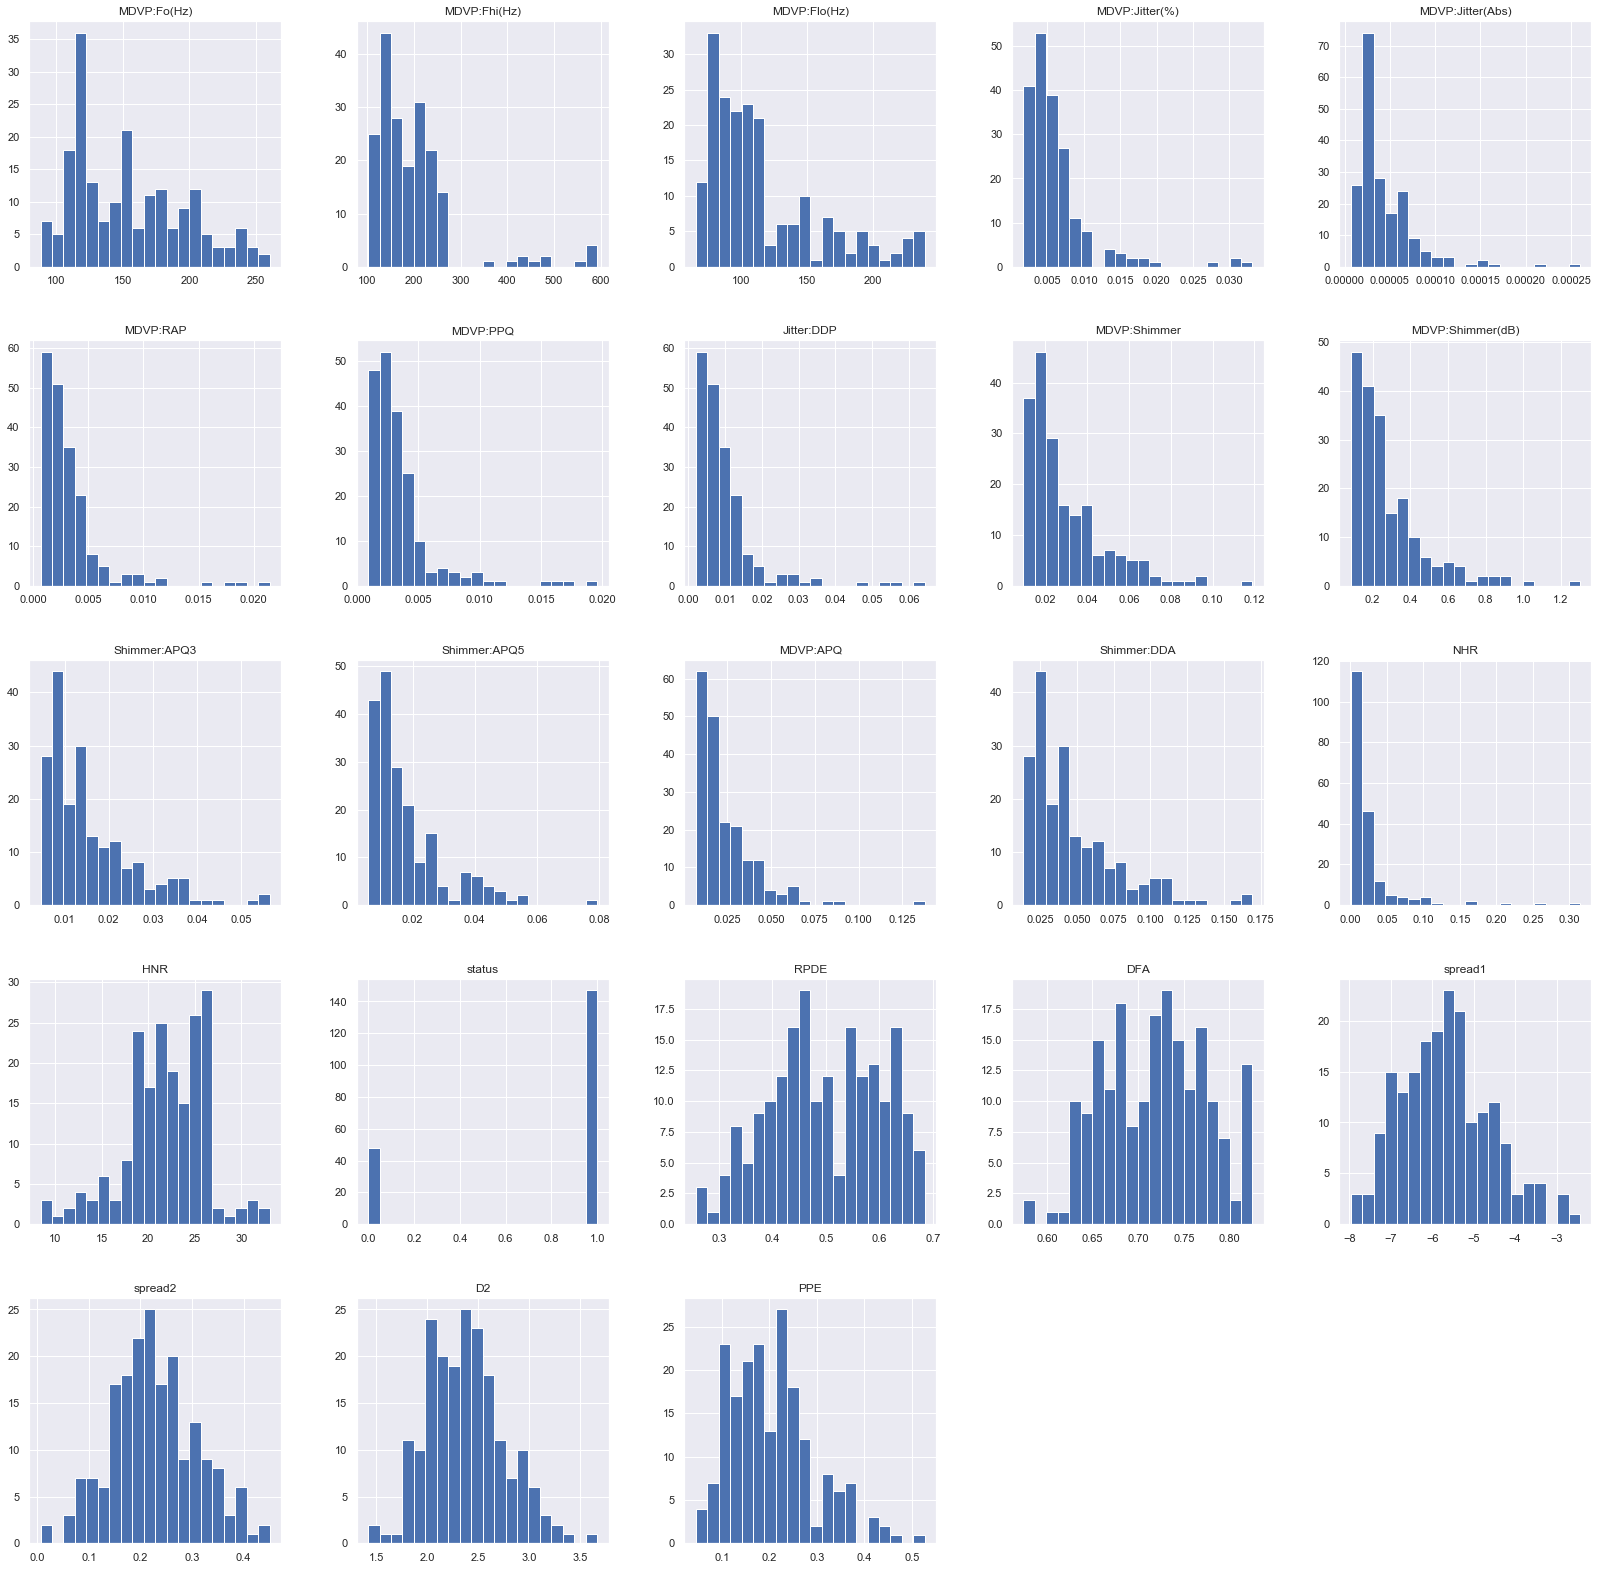

In [563]:
df.hist(bins=20, figsize=(28,28)) ;

<font color='Blue'> <b> All the continuous attributes are normally distributed. Most of the attributes seem to have positive skewness</b></font>

Skewness of [MDVP:Fo(Hz)] attribute      : 0.592
Skewness of [MDVP:Fhi(Hz)] attribute     : 2.542
Skewness of [MDVP:Flo(Hz)] attribute     : 1.217
Skewness of [MDVP:Jitter(%)] attribute   : 3.085
Skewness of [MDVP:Jitter(Abs)] attribute : 2.649
Skewness of [MDVP:RAP] attribute         : 3.361


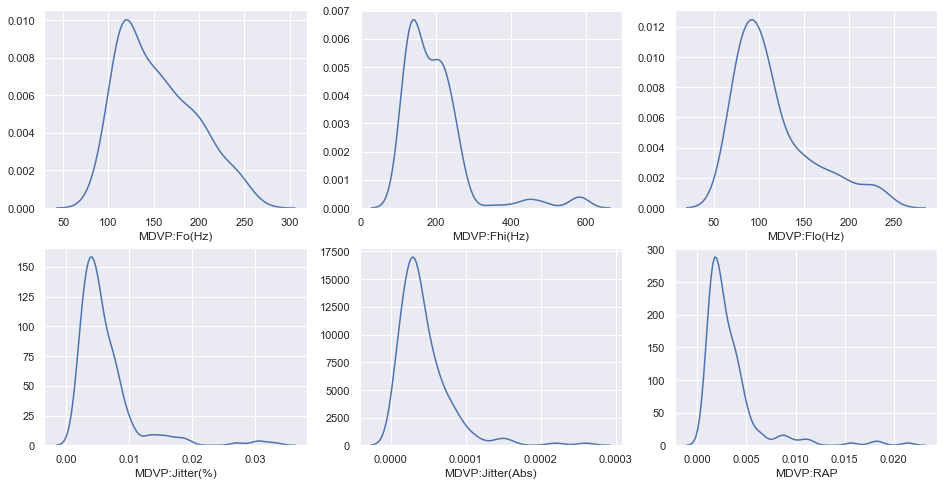

In [564]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(df['MDVP:Fo(Hz)']     ,hist=False, ax=ax[0][0]) ;
sns.distplot(df['MDVP:Fhi(Hz)']    ,hist=False, ax=ax[0][1]) ;
sns.distplot(df['MDVP:Flo(Hz)']    ,hist=False,ax=ax[0][2]);
sns.distplot(df['MDVP:Jitter(%)']  ,hist=False,ax=ax[1][0]); 
sns.distplot(df['MDVP:Jitter(Abs)'],hist=False,ax=ax[1][1]); 
sns.distplot(df['MDVP:RAP']        ,hist=False,ax=ax[1][2]);

print ('Skewness of [MDVP:Fo(Hz)] attribute      :', round(df['MDVP:Fo(Hz)'].skew(),3))
print ('Skewness of [MDVP:Fhi(Hz)] attribute     :', round(df['MDVP:Fhi(Hz)'].skew(),3))
print ('Skewness of [MDVP:Flo(Hz)] attribute     :', round(df['MDVP:Flo(Hz)'].skew(),3))
print ('Skewness of [MDVP:Jitter(%)] attribute   :', round(df['MDVP:Jitter(%)'].skew(),3))
print ('Skewness of [MDVP:Jitter(Abs)] attribute :', round(df['MDVP:Jitter(Abs)'].skew(),3))
print ('Skewness of [MDVP:RAP] attribute         :', round(df['MDVP:RAP'].skew(),3))

Skewness of [MDVP:PPQ] attribute         : 3.074
Skewness of [Jitter:DDP] attribute       : 3.362
Skewness of [MDVP:Shimmer] attribute     : 1.666
Skewness of [MDVP:Shimmer(dB)] attribute : 1.999
Skewness of [Shimmer:APQ3] attribute     : 1.581
Skewness of [Shimmer:APQ5] attribute     : 1.799


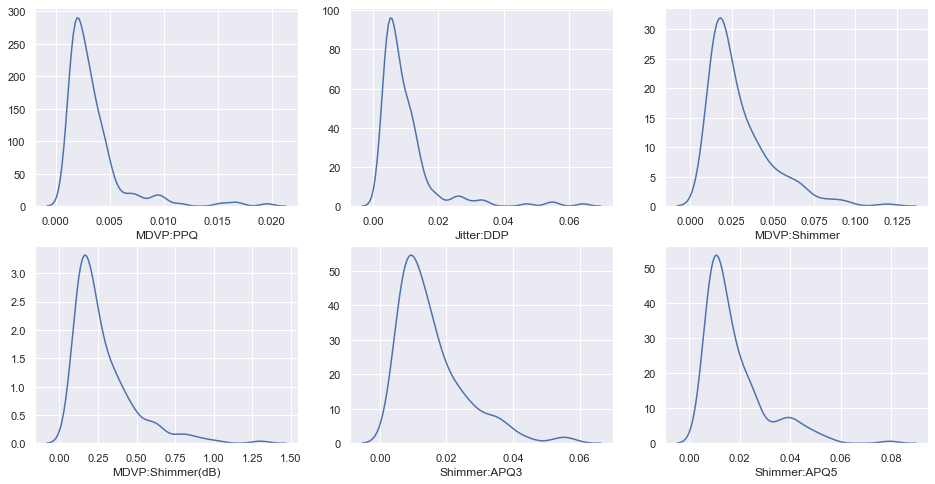

In [565]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(df['MDVP:PPQ']        ,hist=False, ax=ax[0][0]) ;
sns.distplot(df['Jitter:DDP']      ,hist=False, ax=ax[0][1]) ;
sns.distplot(df['MDVP:Shimmer']    ,hist=False,ax=ax[0][2]);
sns.distplot(df['MDVP:Shimmer(dB)'],hist=False,ax=ax[1][0]); 
sns.distplot(df['Shimmer:APQ3']    ,hist=False,ax=ax[1][1]); 
sns.distplot(df['Shimmer:APQ5']    ,hist=False,ax=ax[1][2]);

print ('Skewness of [MDVP:PPQ] attribute         :', round(df['MDVP:PPQ'].skew(),3))
print ('Skewness of [Jitter:DDP] attribute       :', round(df['Jitter:DDP'].skew(),3))
print ('Skewness of [MDVP:Shimmer] attribute     :', round(df['MDVP:Shimmer'].skew(),3))
print ('Skewness of [MDVP:Shimmer(dB)] attribute :', round(df['MDVP:Shimmer(dB)'].skew(),3))
print ('Skewness of [Shimmer:APQ3] attribute     :', round(df['Shimmer:APQ3'].skew(),3))
print ('Skewness of [Shimmer:APQ5] attribute     :', round(df['Shimmer:APQ5'].skew(),3))

Skewness of [MDVP:APQ] attribute          : 2.618
Skewness of [Shimmer:DDA] attribute       : 1.581
Skewness of [NHR] attribute               : 4.221
Skewness of [HNR] attribute               : -0.514
Skewness of [RPDE] attribute              : -0.143
Skewness of [DFA] attribute               : -0.033


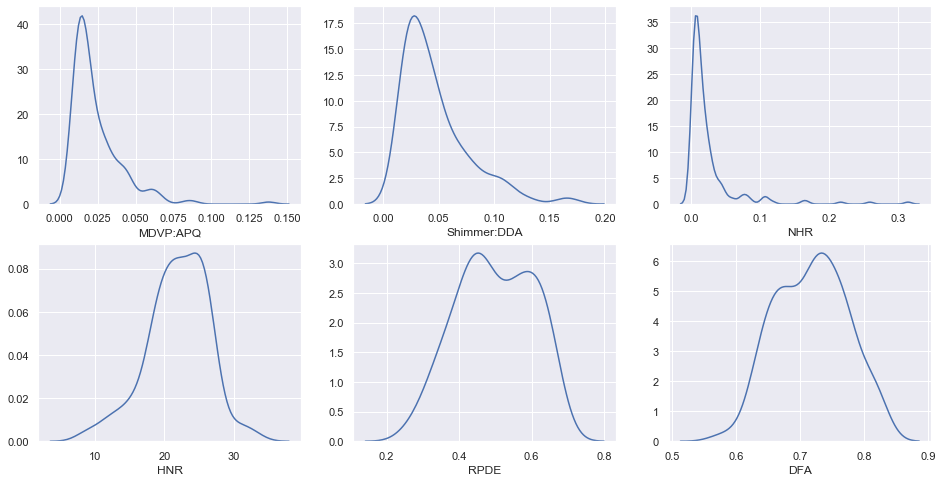

In [566]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(df['MDVP:APQ']    ,hist=False, ax=ax[0][0]) ;
sns.distplot(df['Shimmer:DDA'] ,hist=False, ax=ax[0][1]) ;
sns.distplot(df['NHR']  ,hist=False,ax=ax[0][2]);
sns.distplot(df['HNR']  ,hist=False,ax=ax[1][0]); 
sns.distplot(df['RPDE'] ,hist=False,ax=ax[1][1]); 
sns.distplot(df['DFA']  ,hist=False,ax=ax[1][2]);

print ('Skewness of [MDVP:APQ] attribute          :', round(df['MDVP:APQ'].skew(),3))
print ('Skewness of [Shimmer:DDA] attribute       :', round(df['Shimmer:DDA'].skew(),3))
print ('Skewness of [NHR] attribute               :', round(df['NHR'].skew(),3))
print ('Skewness of [HNR] attribute               :', round(df['HNR'].skew(),3))
print ('Skewness of [RPDE] attribute              :', round(df['RPDE'].skew(),3))
print ('Skewness of [DFA] attribute               :', round(df['DFA'].skew(),3))

Skewness of [spread1] attribute          : 0.432
Skewness of [spread2] attribute          : 0.144
Skewness of [D2] attribute               : 0.43
Skewness of [PPE] attribute              : 0.797


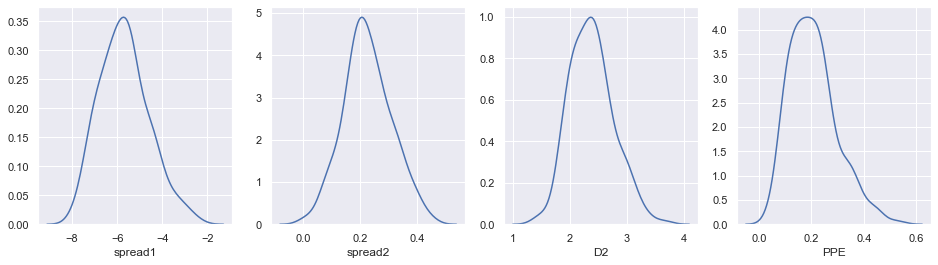

In [567]:
fig, ax = plt.subplots(1,4,figsize=(16,4)) 
sns.distplot(df['spread1'] ,hist=False, ax=ax[0]) ;
sns.distplot(df['spread2'] ,hist=False, ax=ax[1]) ;
sns.distplot(df['D2']      ,hist=False,ax=ax[2]);
sns.distplot(df['PPE']     ,hist=False,ax=ax[3]); 

print ('Skewness of [spread1] attribute          :', round(df['spread1'].skew(),3))
print ('Skewness of [spread2] attribute          :', round(df['spread2'].skew(),3))
print ('Skewness of [D2] attribute               :', round(df['D2'].skew(),3))
print ('Skewness of [PPE] attribute              :', round(df['PPE'].skew(),3))

1. The attributes <b>HNR, RPDE </b> and <b>DFA</b> have negative skewness while all other attributes have positive skewness.<br/><br/>
2. Visibly long tails for <b>MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer(dB), MDVP:APQ</b> and <b>NHR</b> attributes and the same can be confirmed by looking at the skew values for the mentioned attributes.

### 3.2 Check for outliers in each attribute

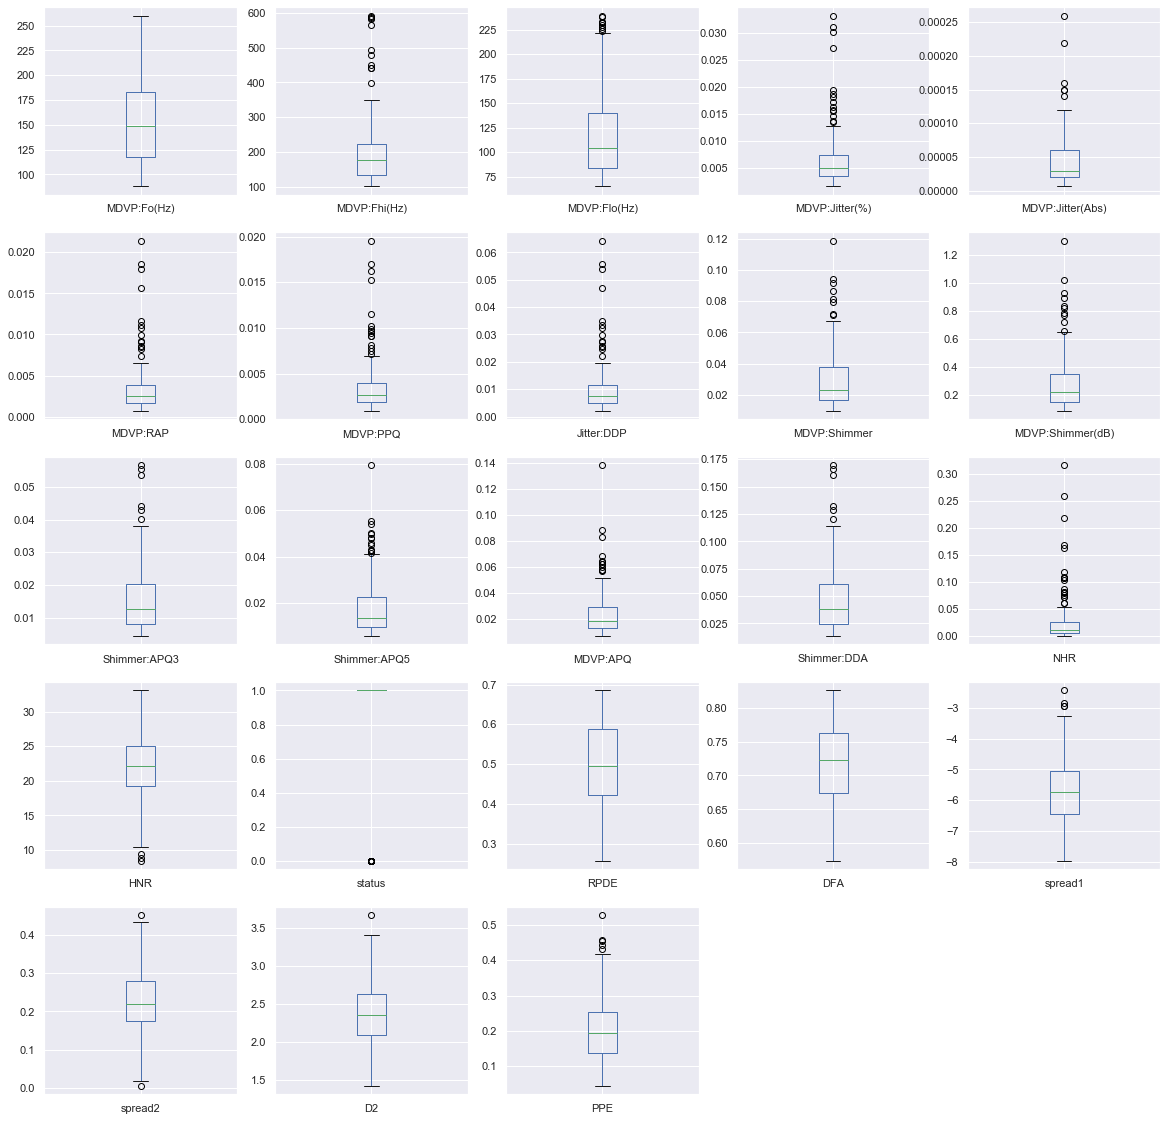

In [568]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

<b> Most of the independent continuous attributes have outliers. Given these are from medicine domain we will not be treating the outliers since they may be genuine readings. </b>

### 3.3 Bivariate analysis

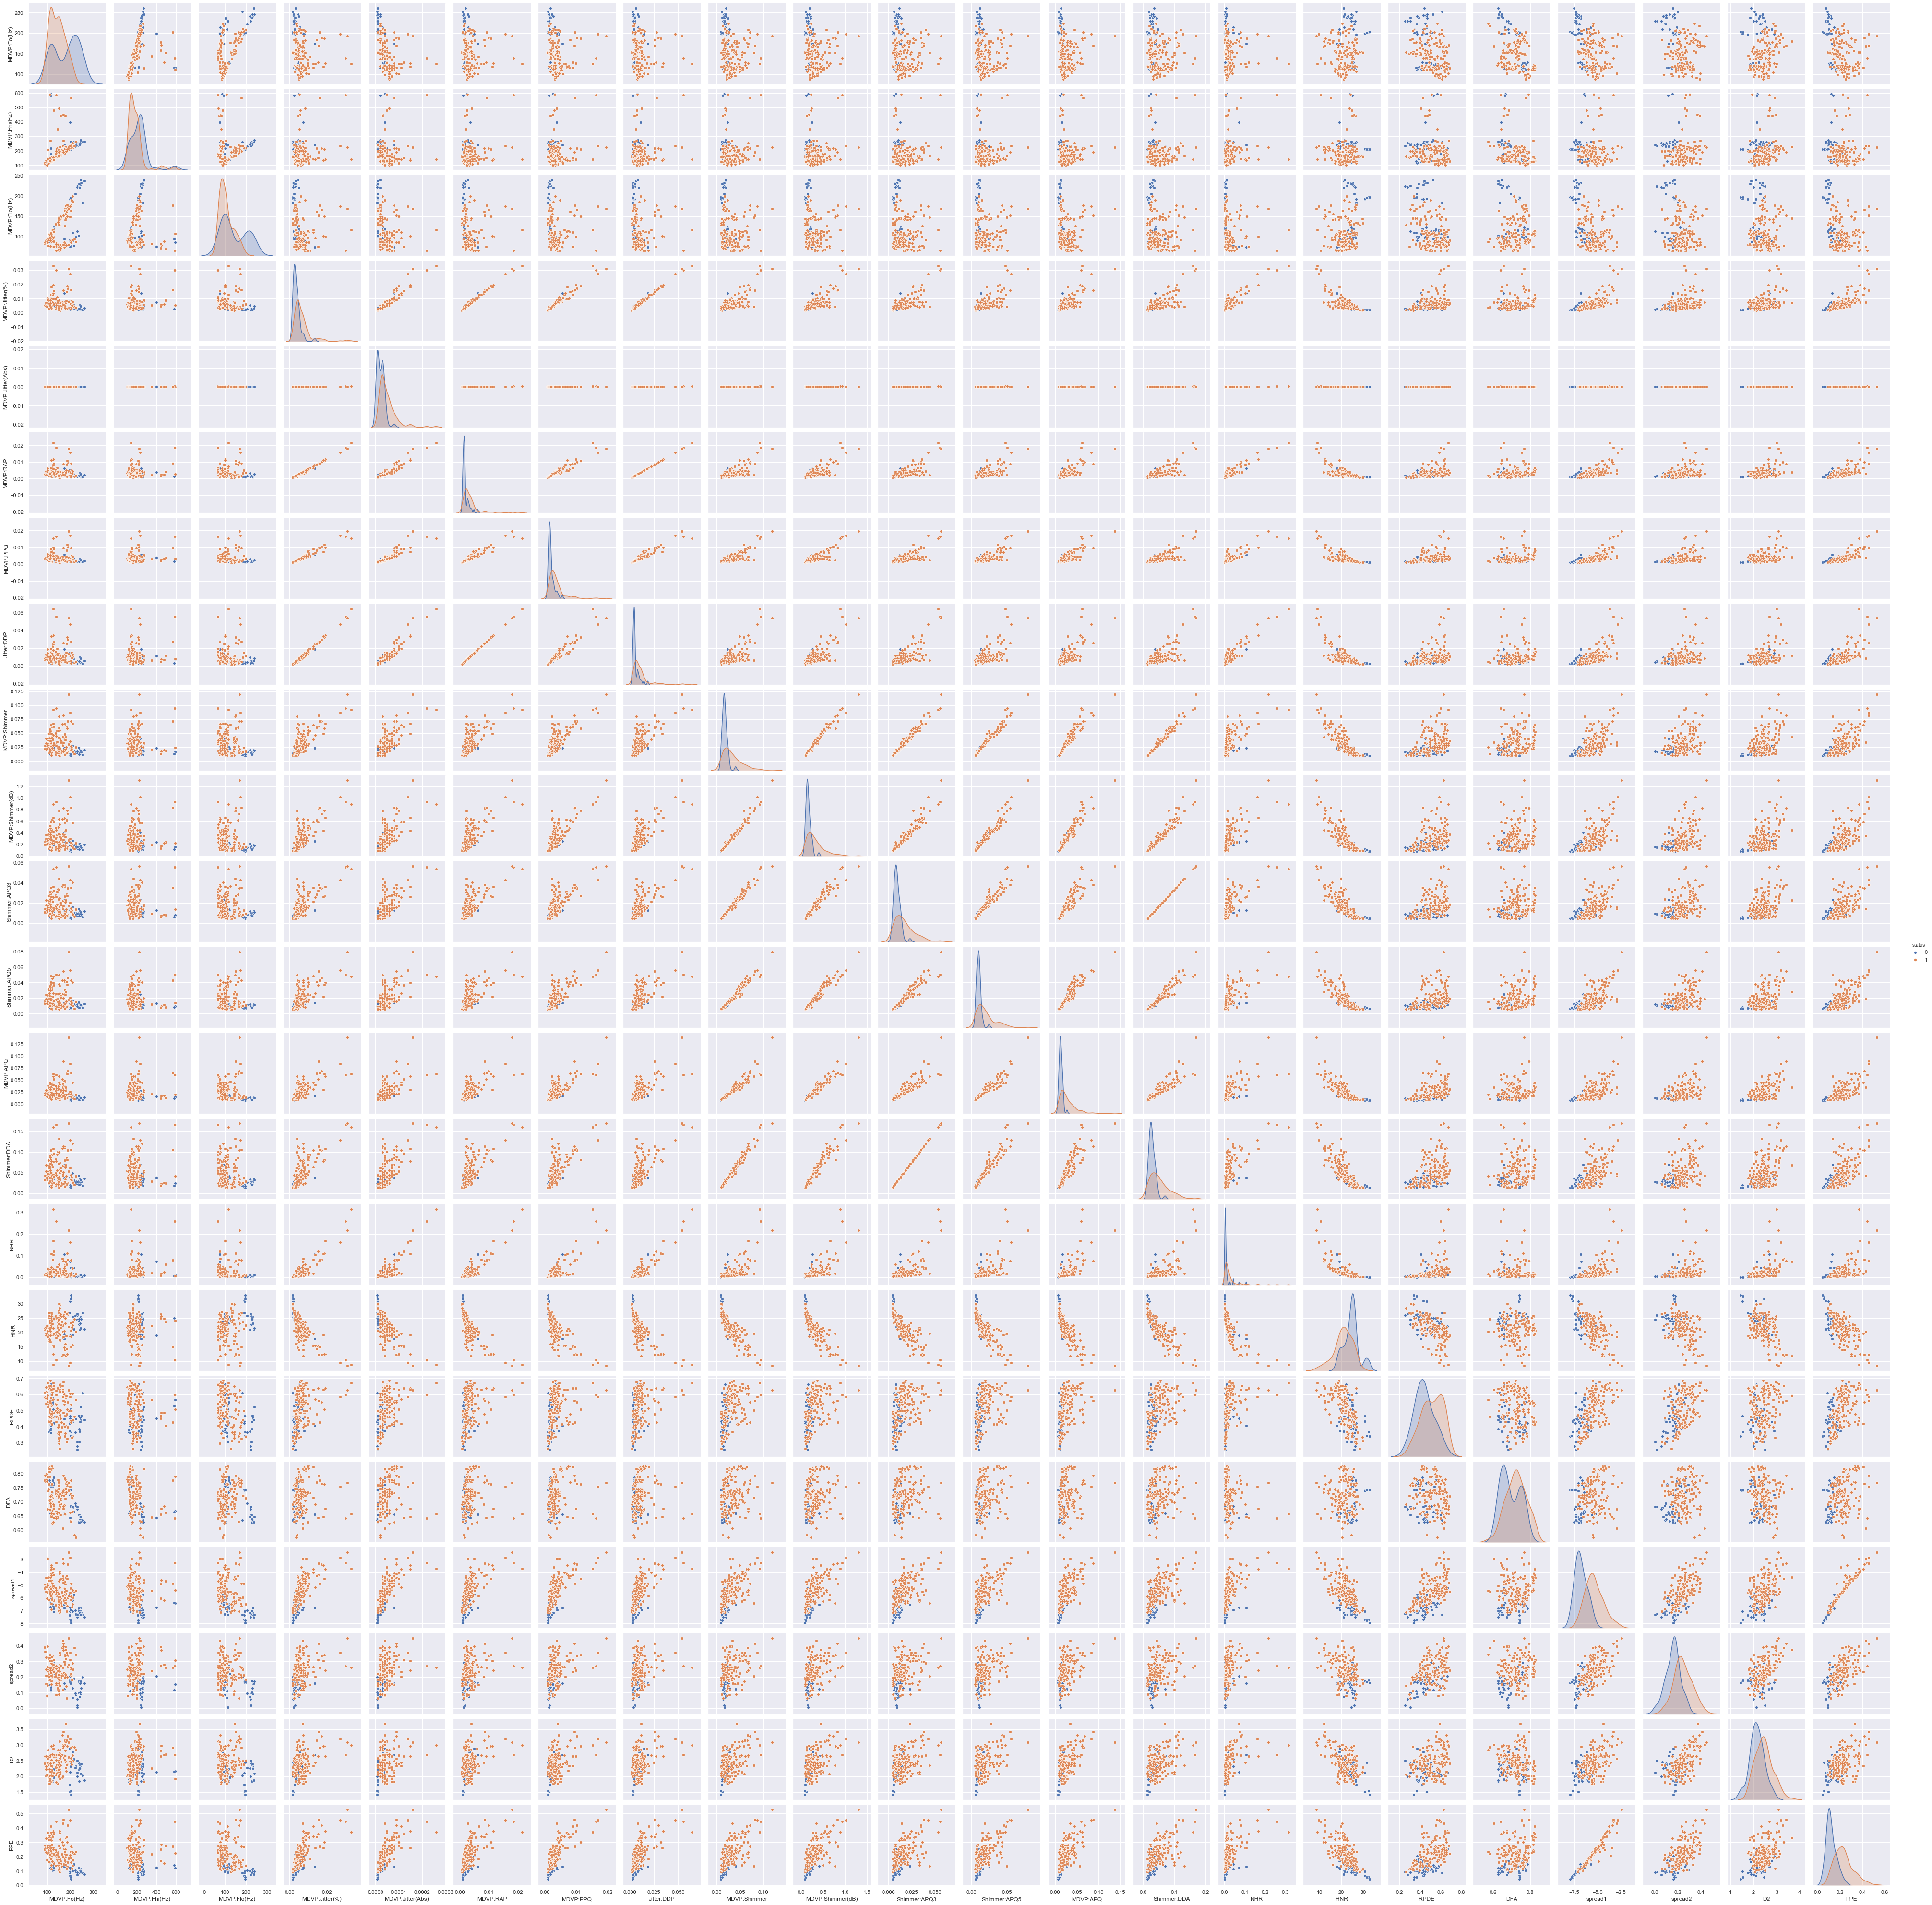

In [569]:
sns.pairplot(df, hue='status');

Let us now study the impact of each attribute on the target variable

##### 3.3.1 Impact of various vocal fundamental frequencies on target variable

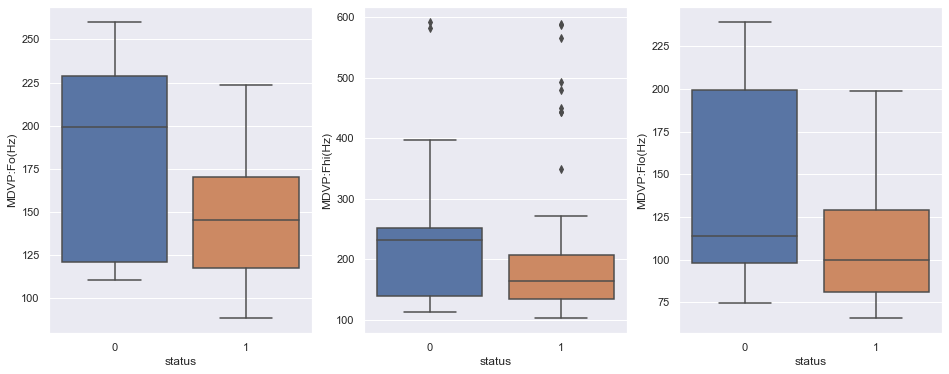

In [570]:
fig, ax = plt.subplots(1,3,figsize=(16,6)) 
sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)' ,data = df,ax=ax[0]) ;
sns.boxplot(x = 'status', y = 'MDVP:Fhi(Hz)',data = df,ax=ax[1]) ;
sns.boxplot(x = 'status', y = 'MDVP:Flo(Hz)',data = df,ax=ax[2]) ;

<b>The Median of all the 3 attributes for Healthy people is higher than that for those having the disease. The median of average vocal fundamental frequency (MDVP:Fo) is around 200Hz for healthy people while the median value is 145Hz for those affected by the disease. </b>

##### 3.3.2 Impact of attributes of measuring variations in fundamental frequency on target variable

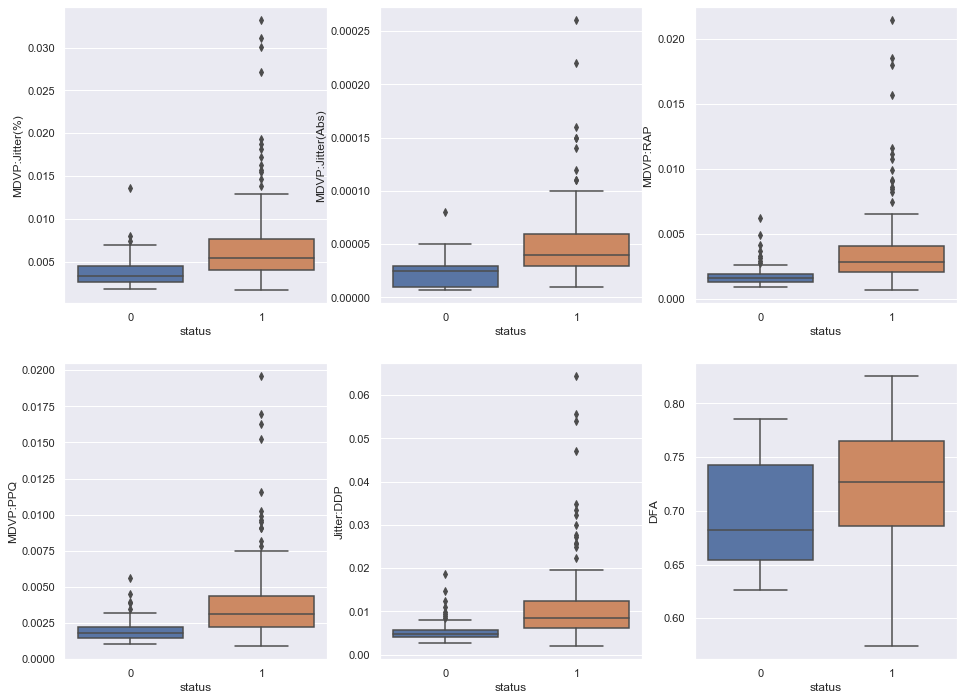

In [571]:
fig, ax = plt.subplots(2,3,figsize=(16,12)) 
sns.boxplot(x = 'status', y = 'MDVP:Jitter(%)'  ,data = df,ax=ax[0][0]) ;
sns.boxplot(x = 'status', y = 'MDVP:Jitter(Abs)',data = df,ax=ax[0][1]) ;
sns.boxplot(x = 'status', y = 'MDVP:RAP'        ,data = df,ax=ax[0][2]) ;
sns.boxplot(x = 'status', y = 'MDVP:PPQ'        ,data = df,ax=ax[1][0]) ;
sns.boxplot(x = 'status', y = 'Jitter:DDP'      ,data = df,ax=ax[1][1]) ;
sns.boxplot(x = 'status', y = 'DFA'             ,data = df,ax=ax[1][2]) ;

<b> The median of various measures of variation in fundamental frequency is lower for healthy people compared to the  people suffering from Parkinsons disease. </b>

##### 3.3.3 Impact of attributes measuring variations in amplitude on target variable

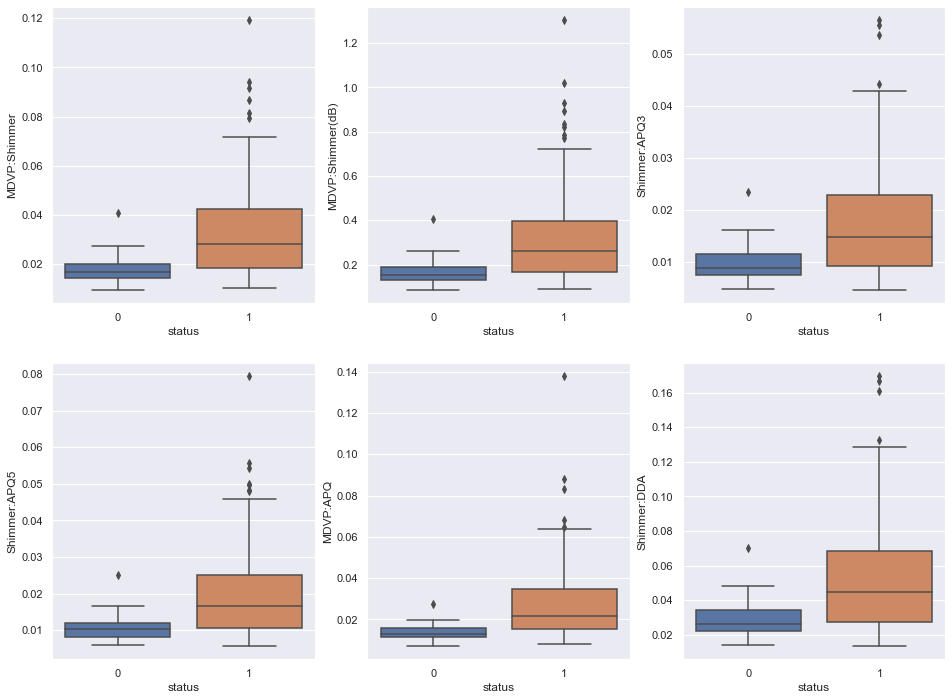

In [572]:
fig, ax = plt.subplots(2,3,figsize=(16,12)) 
sns.boxplot(x = 'status', y = 'MDVP:Shimmer'    ,data = df,ax=ax[0][0]) ;
sns.boxplot(x = 'status', y = 'MDVP:Shimmer(dB)',data = df,ax=ax[0][1]) ;
sns.boxplot(x = 'status', y = 'Shimmer:APQ3'    ,data = df,ax=ax[0][2]) ;
sns.boxplot(x = 'status', y = 'Shimmer:APQ5'    ,data = df,ax=ax[1][0]) ;
sns.boxplot(x = 'status', y = 'MDVP:APQ'        ,data = df,ax=ax[1][1]) ;
sns.boxplot(x = 'status', y = 'Shimmer:DDA'     ,data = df,ax=ax[1][2]) ;

<b> The median of various measures of variation in amplitude is also lower for healthy people compared to the  people suffering from the disease. </b> 

##### 3.3.4 Impact of attributes measuring noise to tonal components ratios on target variable

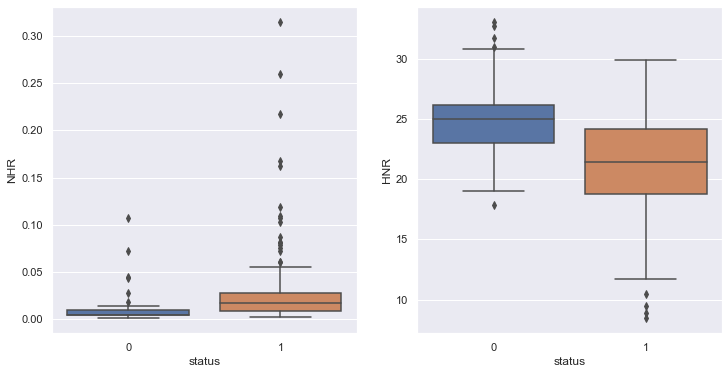

In [573]:
fig, ax = plt.subplots(1,2,figsize=(12,6)) 
sns.boxplot(x = 'status', y = 'NHR',data = df,ax=ax[0]) ;
sns.boxplot(x = 'status', y = 'HNR',data = df,ax=ax[1]) ;

##### 3.3.5 Impact of nonlinear dynamical complexity measuring attributes on target variable

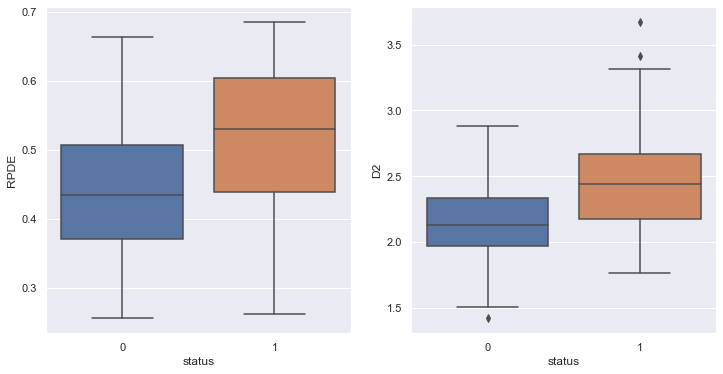

In [574]:
fig, ax = plt.subplots(1,2,figsize=(12,6)) 
sns.boxplot(x = 'status', y = 'RPDE',data = df,ax=ax[0]) ;
sns.boxplot(x = 'status', y = 'D2'  ,data = df,ax=ax[1]) ;

##### 3.3.6 Impact of nonlinear measures of fundamental frequency on target variable

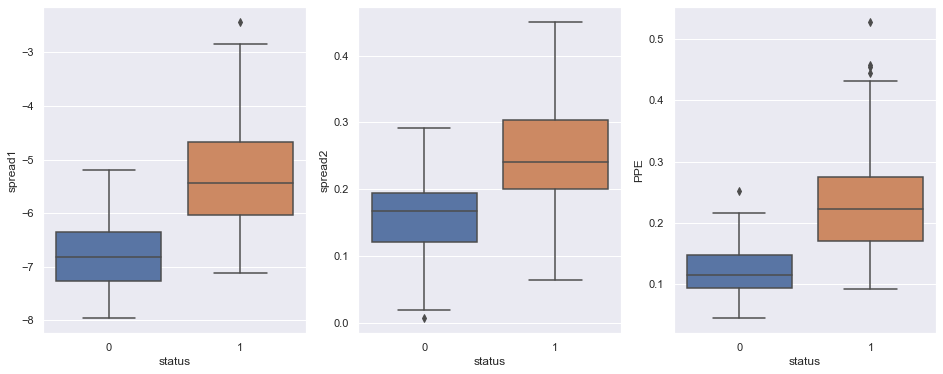

In [575]:
fig, ax = plt.subplots(1,3,figsize=(16,6)) 
sns.boxplot(x = 'status', y = 'spread1',data = df,ax=ax[0]) ;
sns.boxplot(x = 'status', y = 'spread2',data = df,ax=ax[1]) ;
sns.boxplot(x = 'status', y = 'PPE'    ,data = df,ax=ax[2]) ;

<b> There is overlap in values of spread1 and spread2 between healthy and sick people. However, the healthy people tend to have lower values for both the attributes compared to the ones having the disease. </b>

### 3.4 Lets check the correlation between the attributes

In [576]:
corr = df.corr()

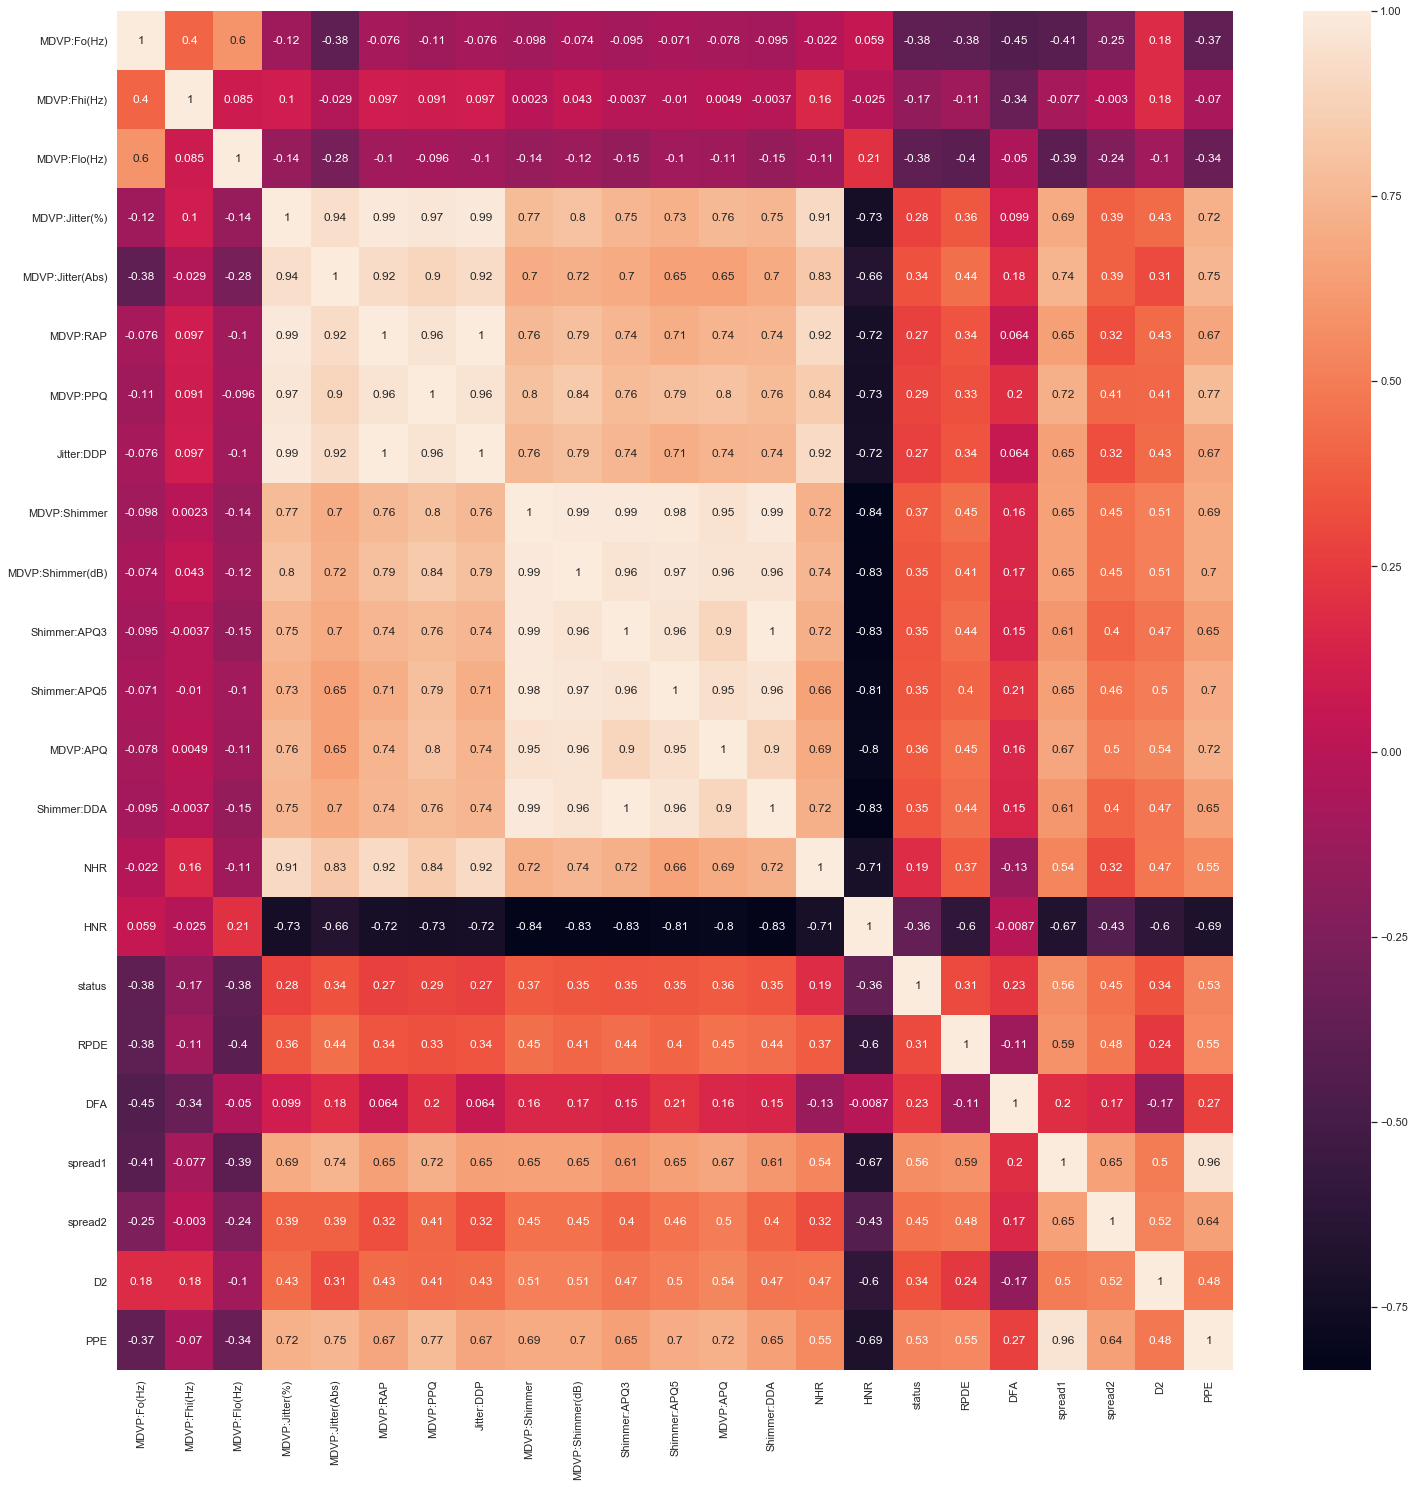

In [577]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5}) ;
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True) ;

<b> The various MDVP:Jitter and MDVP:Shimmer attributes have a high correlation between them. This is possibly due to the fact that these attributes are various measures of same basic feature (in this case voice amplitude and frequency) </b><br/><br/>

<b>Summary : </b> </font> <br/> <br/>
<b>1. All the continuous attributes are normally distributed. Most of the attributes seem to have positive skewness </b> <br/> <br/>
<b>2. The attributes HNR, RPDE and DFA have negative skewness while all other attributes have positive skewness </b> <br/> <br/>
<b>3. Visibly long tails for MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer(dB), MDVP:APQ and NHR attributes and the same can be confirmed by looking at the skew values for the mentioned attributes</b> <br/> <br/>
<b>4. Most of the independent continuous attributes have outliers. Given these are from medicine domain we will not be treating the outliers since they may be genuine readings</b> <br/> <br/>
<b>5. The median value of vocal fundamental frequency attributes for Healthy people is higher than that for those having the disease. The median of average vocal fundamental frequency (MDVP:Fo) is around 200Hz for healthy people while the median value is 145Hz for those affected by the disease </b> <br/><br/>
<b>6. The median of various measures of variation in fundamental frequency and amplitude is lower for healthy people compared to the people suffering from Parkinsons disease</b> <br/><br/>
<b>7. There is overlap in values of spread1 and spread2 between healthy and sick people. However, the healthy people tend to have lower values for both the attributes compared to the ones having the disease </b> <br/><br/>
<b>8. The various MDVP:Jitter and MDVP:Shimmer attributes have a high correlation between them. This is possibly due to the fact that these attributes are various measures of same basic feature (in this case voice amplitude and frequency)</b> <br/><br/>
<b>9. The Average vocal fundamental frequency is negatively correlated to the various measures of variation in fundamental frequency </b><br/><br/>
<b>10. The Average vocal fundamental frequency is negatively correlated to the various measures of variation in amplitude </b> <br/><br/>    
<br/>

## 4. Let's now split the data into Training and Test sets

### 4.1 Drop the attributes which do not impact the target column 

In [578]:
# We will drop the name column since it is used to uniquely identify patients and does not impact the target variable
X = df.drop(['name','status'], axis=1)     
y = df['status']   

### 4.2 Split the data into training and test set in the ratio of 70:30 respectively

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### 4.3 Check the distribution of target column in Training and Test data-sets

In [580]:
print("Number of people who DO NOT have PD       : {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 0]), (len(df.loc[df['status'] == 0])/len(df.index)) * 100))
print("Number of people who have PD              : {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 1]), (len(df.loc[df['status'] == 1])/len(df.index)) * 100))
print("")
print("People in training set who DO NOT have PD : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("People in training set who have PD        : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("")
print("People in test set who DO NOT have PD     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("People in test set who have PD            : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("\n\n")

Number of people who DO NOT have PD       : 48 (24.62%)
Number of people who have PD              : 147 (75.38%)

People in training set who DO NOT have PD : 33 (24.26%)
People in training set who have PD        : 103 (75.74%)

People in test set who DO NOT have PD     : 15 (25.42%)
People in test set who have PD            : 44 (74.58%)





## 5. Prepare the data for training - Scale the data 

Due to varying magnitudes and units of measurements like Hertz, Decibel and percentage, it is advisable to scale our training and test data-sets 

In [581]:
scaler = preprocessing.StandardScaler()

In [582]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [583]:
pd.DataFrame(X_train_scaled).head()

0         1         2         3         4         5         6   \
0  0.682190  0.084152  1.377240 -0.637875 -0.643071 -0.549656 -0.602507   
1  1.154314  0.175697  1.770112 -0.716083 -0.903130 -0.605806 -0.691806   
2 -0.967218 -0.855405 -0.477724 -0.519654 -0.383013 -0.496462 -0.484506   
3 -0.391366 -0.374326  0.333833 -0.621506 -0.643071 -0.653090 -0.643968   
4  1.000545  0.168917 -0.870147  0.238784 -0.122954  0.328055  0.108692   

         7         8         9   ...        12        13        14        15  \
0 -0.549742 -0.757590 -0.725615  ... -0.679629 -0.771565 -0.537288  0.998712   
1 -0.605891 -0.964363 -0.919293  ... -0.906478 -0.971136 -0.551191  1.863163   
2 -0.495563 -0.744094 -0.716392  ... -0.701890 -0.751127 -0.483629  0.959418   
3 -0.652189 -0.846758 -0.813232  ... -0.706130 -0.834382 -0.461253  0.785788   
4  0.328941  0.013591 -0.061576  ... -0.205792  0.170684 -0.381743  0.010415   

         16        17        18        19        20        21  
0 -0.929391  0.796493 -0.686531 -0.188934 -0.303867 -0.697182  
1 -0.650990  0.351740 -1.797508 -0.667983 -0.718022 -1.476600  
2 -1.159785  0.805534 -0.227382 -0.436528 -1.342058 -0.296497  
3 -0.376429 -1.401368 -0.772382 -0.920026 -0.872009 -0.733452  
4 -0.016140  0.323825 -0.138540  0.627015  0.541296 -0.232904  

[5 rows x 22 columns]

In [584]:
pd.DataFrame(X_test_scaled).head()

0         1         2         3         4         5         6   \
0 -1.052375 -0.843360 -0.226337 -0.441816 -0.091243 -0.462839 -0.204595   
1 -0.313607  1.550126 -0.692890 -0.178586 -0.091243 -0.633117 -0.191367   
2 -0.922167 -0.835405 -0.410959  0.197981  0.326069  0.281338 -0.138452   
3  0.031579 -0.388593  0.664206 -0.917094 -0.925867 -0.841234 -0.905713   
4 -0.328752 -0.460596 -1.063731  1.857797  1.578006  2.116553  0.966139   

         7         8         9   ...        12        13        14        15  \
0 -0.460843  2.095497  1.955362  ...  1.994420  2.069425  0.306331 -1.435486   
1 -0.635351 -0.619418 -0.598730  ... -0.169647 -0.756848 -0.056383  0.139881   
2  0.279242  0.165763  0.061405  ...  0.128971  0.170894  0.307273  0.170964   
3 -0.839295  0.387728  0.305026  ...  0.499512  0.368191 -0.530737  0.244546   
4  2.116840  1.899957  1.648871  ...  1.030286  2.178835  1.367621 -0.492866   

         16        17        18        19        20        21  
0  1.356008 -0.099073  0.031853  0.942159  0.179842  0.064297  
1  0.663089 -1.119250  0.219059  0.182506 -0.287810  0.177909  
2  1.236903 -0.987338  2.005428 -0.182701  0.241320  0.027135  
3 -1.230640 -0.242533 -0.721511 -0.335056  0.342985 -0.663513  
4  0.153108  0.441309 -0.194459 -0.825969 -0.729028 -0.234655  

[5 rows x 22 columns]

<br/><br/>The data is scaled and there are no missing values. So we are ready to use the data for the model. <br/><br/>

## 6. We will now train the Standard Classification algorithms 

##### 6.1 Logistic Regression model

In [585]:
logreg = LogisticRegression(solver='liblinear')

# Fit the logistic regression model on scaled training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [586]:
print ("Score of [Training] data set : ",round(logreg.score(X_train_scaled, y_train),2))

Score of [Training] data set :  0.87


In [587]:
# Predict on scaled test data set
logreg_y_predict = logreg.predict(X_test_scaled)

In [588]:
print ("Score of [Test] data set     : ",round(logreg.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.86


In [589]:
print("Logistic Regression Accuracy : ",round(metrics.accuracy_score(y_test, logreg_y_predict)*100,2),'%' )

Logistic Regression Accuracy :  86.44 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



[[ 9  6]
 [ 2 42]]




Text(30.5, 0.5, 'Actuals / Truth')

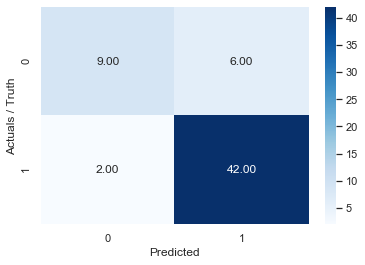

In [648]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, logreg_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, logreg_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 6.2 Naive Bayes model

In [591]:
NB = GaussianNB()

# Fit the Naive Bayes model on scaled training data
NB.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [592]:
print ("Score of [Training] data set : ",round(NB.score(X_train_scaled, y_train),2))

Score of [Training] data set :  0.68


In [593]:
# Predict on scaled test data set
NB_y_predict = NB.predict(X_test_scaled)

In [594]:
print ("Score of [Test] data set     : ",round(NB.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.78


In [595]:
print("Naive Bayes Accuracy : ",round(metrics.accuracy_score(y_test, NB_y_predict)*100,2),'%' )

Naive Bayes Accuracy :  77.97 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.86      0.84      0.85        44

    accuracy                           0.78        59
   macro avg       0.71      0.72      0.72        59
weighted avg       0.78      0.78      0.78        59



[[ 9  6]
 [ 7 37]]




Text(30.5, 0.5, 'Actuals / Truth')

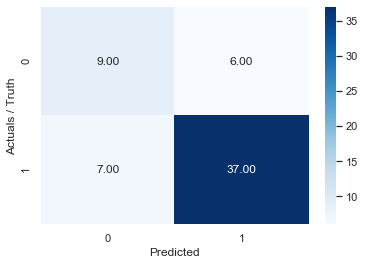

In [649]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, NB_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, NB_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 6.3 K-Nearest Neighbours model

In [597]:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model on scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [598]:
print ("Score of [Training] data set : ",round(knn.score(X_train_scaled, y_train),2))

Score of [Training] data set :  0.98


In [599]:
# Predict on scaled test data set
knn_y_predict = knn.predict(X_test_scaled)

In [600]:
print ("Score of [Test] data set     : ",round(knn.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.92


In [601]:
print("K-Nearest Neighbours Accuracy : ",round(metrics.accuracy_score(y_test, knn_y_predict)*100,2),'%' )

K-Nearest Neighbours Accuracy :  91.53 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



[[10  5]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

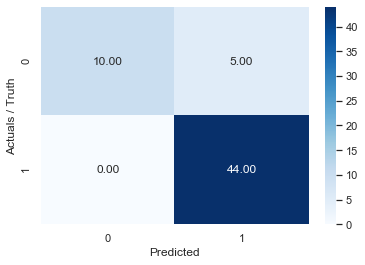

In [650]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, knn_y_predict))
print ("\n")


#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, knn_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 6.4 Support Vector Machines model

In [603]:
SVM = svm.SVC(gamma=0.025, C=3)

# Fit the SVM model on scaled training data
SVM.fit(X_train_scaled, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [604]:
print ("Score of [Training] data set : ",round(SVM.score(X_train_scaled, y_train),2))

Score of [Training] data set :  0.89


In [605]:
# Predict on scaled test data set
svm_y_predict = SVM.predict(X_test_scaled)

In [606]:
print ("Score of [Test] data set     : ",round(SVM.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.88


In [607]:
print("Support Vector Machines Accuracy : ",round(metrics.accuracy_score(y_test, svm_y_predict)*100,2),'%' )

Support Vector Machines Accuracy :  88.14 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59



[[ 8  7]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

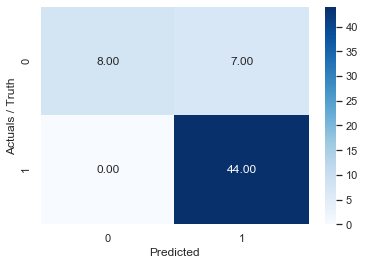

In [651]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, svm_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, svm_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 6.5 Decision Trees model

In [609]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=42)

# Fit the Decision Tree model on scaled training data
dTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [610]:
print ("Score of [Training] data set : ",round(dTree.score(X_train_scaled, y_train),2))

Score of [Training] data set :  1.0


In [611]:
# Predict on scaled test data set
dTree_y_predict = dTree.predict(X_test_scaled)

In [612]:
print ("Score of [Test] data set     : ",round(dTree.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.86


In [613]:
print("Decision Trees Accuracy : ",round(metrics.accuracy_score(y_test, dTree_y_predict)*100,2),'%' )

Decision Trees Accuracy :  86.44 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59



[[10  5]
 [ 3 41]]




Text(30.5, 0.5, 'Actuals / Truth')

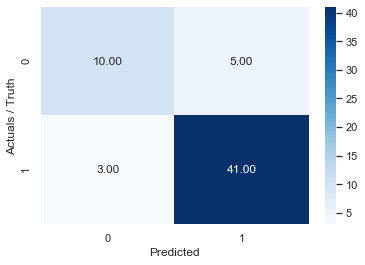

In [652]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, dTree_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, dTree_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### Summary of Basic Models :
<table><head><tr><td> <b>Model Name</b><td> <b>Model Accuracy on Test Data </b></td><td><b>False Positive</b></td><td><b>False Negative</b></td></tr></head>
<tr><td>Logistic Regression</td><td>86.44 %</td><td>6</td><td>2</td></tr>
<tr><td>Naive Bayes</td><td>77.97 %</td><td>6</td><td>7</td></tr>
<tr><td>K-Nearest Neighbours</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>Support Vector Machines</td><td>88.14 %</td><td>7</td><td>0</td></tr>
<tr><td>Decision Trees</td><td>86.44 %</td><td>5</td><td>3</td></tr></table>

<b> The KNN with 3 nearest neighbours gives the best accuracy on Test data. Also, KNN and SVM are the only two models which have zero False Negatives which is important in this case </b><br/><br/>

## 7. Now we will train a Stacking meta-classifier

In [615]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = DecisionTreeClassifier(criterion = 'gini', random_state=42)
clf3 = GaussianNB()
clf4 = svm.SVC(gamma=0.025, C=3)
lr   = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, lr], meta_classifier = lr)


for clf, label in zip([clf1, clf2, clf3, clf4, lr, sclf], 
                      ['KNN', 
                       'Decision Tree', 
                       'Naive Bayes',
                       'Support Vector Machine',
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train_scaled, y_train, cv=7, scoring='accuracy')  
    #print (scores)
    print("Accuracy on [Training] data: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label))
          

Accuracy on [Training] data: 91.13 (+/- 0.04) [KNN]
Accuracy on [Training] data: 82.33 (+/- 0.09) [Decision Tree]
Accuracy on [Training] data: 67.59 (+/- 0.07) [Naive Bayes]
Accuracy on [Training] data: 86.69 (+/- 0.05) [Support Vector Machine]
Accuracy on [Training] data: 85.26 (+/- 0.08) [Logistic Regression]
Accuracy on [Training] data: 88.16 (+/- 0.05) [StackingClassifier]


In [616]:
# Predict on scaled test data set
sclf_fit = sclf.fit(X_train_scaled, y_train)
sclf_predict = sclf_fit.predict(X_test_scaled)

In [617]:
print("Stacking Meta-Classifier Accuracy : ",round(metrics.accuracy_score(y_test, sclf_predict)*100,2),'%' )

Stacking Meta-Classifier Accuracy :  91.53 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



[[10  5]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

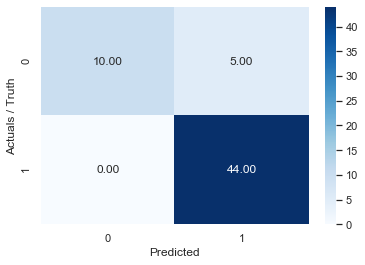

In [653]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, sclf_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, sclf_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The Stacking Classifier has an accuracy of 88.16 % on Training data-set and 91.53% accuracy on Test data-set. <br/> Also, the False Negatives is 0 on Test data as predicted by the Stacking Classifier model </b><br/>

##### Advantages of Stacking : 
1. Same dataset can be exposed and analyzed by different ML models that are good in different ways <br/>
2. Unlike Bagging , Stacking is not limited to just decision tress and are Versatile/ Flexible to other models. <br/>
3. Unlike Boosting , the model is not seqentially improved based on predictions, A single model is used to do the best prediction among the other models. <br/><br/>

## 8. Now we will train various Ensemble models

##### 8.1 Random Forest model

In [619]:
rfclf = RandomForestClassifier(n_estimators = 70)

# Fit the Random Forest model on scaled training data
rfclf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [620]:
print ("Score of [Training] data set : ",round(rfclf.score(X_train_scaled, y_train),2))

Score of [Training] data set :  1.0


In [621]:
# Predict on scaled test data set
rfclf_y_predict = rfclf.predict(X_test_scaled)

In [622]:
print ("Score of [Test] data set     : ",round(rfclf.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.9


In [623]:
print("Random Forest Accuracy : ",round(metrics.accuracy_score(y_test, rfclf_y_predict)*100,2),'%' )

Random Forest Accuracy :  89.83 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59



[[ 9  6]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

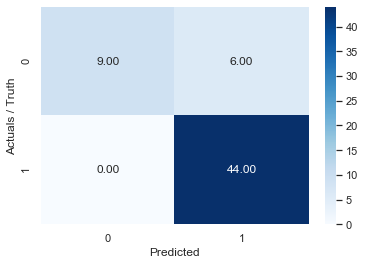

In [654]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, rfclf_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, rfclf_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 8.2 Bagging Classifier model

In [625]:
bgclf = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True)

# Fit the Bagging Classifier model on scaled training data
bgclf.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [626]:
print ("Score of [Training] data set : ",round(bgclf.score(X_train_scaled, y_train),2))

Score of [Training] data set :  1.0


In [627]:
# Predict on scaled test data set
bgclf_y_predict = bgclf.predict(X_test_scaled)

In [628]:
print ("Score of [Test] data set     : ",round(bgclf.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.92


In [629]:
print("Bagging Classifier Accuracy : ",round(metrics.accuracy_score(y_test, bgclf_y_predict)*100,2),'%' )

Bagging Classifier Accuracy :  91.53 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



[[10  5]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

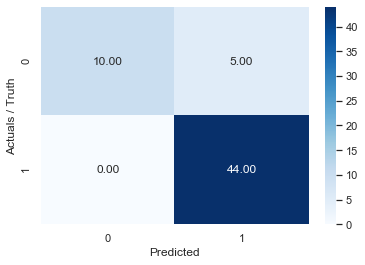

In [655]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, bgclf_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, bgclf_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 8.3 AdaBoost Classifier Model

In [658]:
abclf = AdaBoostClassifier( n_estimators = 50)

# Fit the AdaBoost classifier model on scaled training data
abclf.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [659]:
print ("Score of [Training] data set : ",round(abclf.score(X_train_scaled, y_train),2))

Score of [Training] data set :  1.0


In [660]:
# Predict on scaled test data set
abclf_y_predict = abclf.predict(X_test_scaled)

In [661]:
print ("Score of [Test] data set     : ",round(abclf.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.9


In [662]:
print("AdaBoost Classifier Accuracy : ",round(metrics.accuracy_score(y_test, abclf_y_predict)*100,2),'%' )

AdaBoost Classifier Accuracy :  89.83 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



[[10  5]
 [ 1 43]]




Text(30.5, 0.5, 'Actuals / Truth')

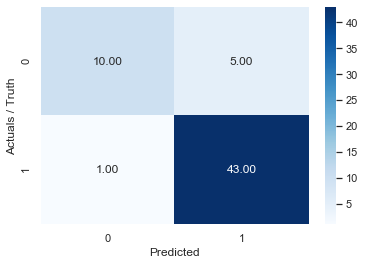

In [664]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, abclf_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, abclf_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 8.4 GradientBoost Classifier Model

In [637]:
gbclf = GradientBoostingClassifier(n_estimators = 70, learning_rate = 1.0)

# Fit the GradientBoost classifier model on scaled training data
gbclf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [638]:
print ("Score of [Training] data set : ",round(gbclf.score(X_train_scaled, y_train),2))

Score of [Training] data set :  1.0


In [639]:
# Predict on scaled test data set
gbclf_y_predict = gbclf.predict(X_test_scaled)

In [640]:
print ("Score of [Test] data set     : ",round(gbclf.score(X_test_scaled, y_test),2))

Score of [Test] data set     :  0.9


In [641]:
print("GradientBoost Classifier Accuracy : ",round(metrics.accuracy_score(y_test, gbclf_y_predict)*100,2),'%' )

GradientBoost Classifier Accuracy :  89.83 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



[[10  5]
 [ 1 43]]




Text(30.5, 0.5, 'Actuals / Truth')

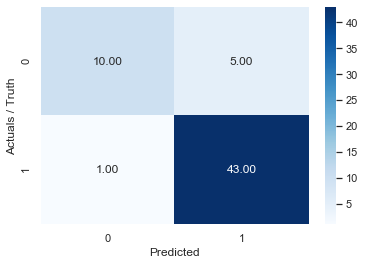

In [665]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, gbclf_y_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, gbclf_y_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### 8.5 Voting Classifier Model

In [643]:
# Training classifiers
dt_clf  = DecisionTreeClassifier(max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=3)
svm_clf = svm.SVC(kernel='rbf', probability=True, C=3, gamma = 0.025)
lr_clf  = LogisticRegression(solver='liblinear')

vot_clf = VotingClassifier(estimators=[('dt', dt_clf), ('knn', knn_clf), ('svm', svm_clf), ('logreg', lr_clf)],
                           voting='soft', weights=[1,1,1,1])

# Train the voting classifier on train data-set
vot_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
      

In [644]:
# Predict on scaled test data set
vot_clf_predict = vot_clf.predict(X_test_scaled)

In [645]:
print("Voting Classifier Accuracy : ",round(metrics.accuracy_score(y_test, vot_clf_predict)*100,2),'%' )

Voting Classifier Accuracy :  93.22 %


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



[[11  4]
 [ 0 44]]




Text(30.5, 0.5, 'Actuals / Truth')

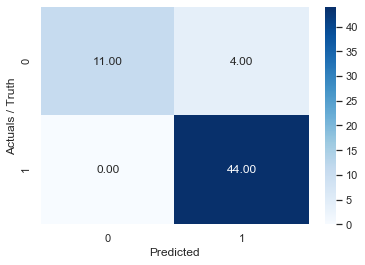

In [647]:
#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, vot_clf_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, vot_clf_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

##### Summary of Ensemble Models :
<table><head><tr><td> <b>Model Name</b><td> <b>Model Accuracy on Test Data </b></td><td><b>False Positive</b></td><td><b>False Negative</b></td></tr></head>
<tr><td>Stacking Meta-classifier</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>Random Forest</td><td>89.83 %</td><td>6</td><td>0</td></tr>
<tr><td>Bagging Classifier</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>AdaBoost Classifier</td><td>89.83 %</td><td>5</td><td>1</td></tr>
<tr><td>GradientBoost Classifier</td><td>89.83 %</td><td>5</td><td>1</td></tr>
<tr><td>Voting Classifier</td><td>93.22 %</td><td>4</td><td>0</td></tr></table>

### Comparision of the models

Summary of all the Supervised learning Models (Basic and Ensemble techniques) is as follows : <br/><br/>

<table><head><tr><td> <b>Model Name</b><td> <b>Model Accuracy on Test Data </b></td><td><b>False Positive</b></td><td><b>False Negative</b></td></tr></head>
<tr><td>Logistic Regression</td><td>86.44 %</td><td>6</td><td>2</td></tr>
<tr><td>Naive Bayes</td><td>77.97 %</td><td>6</td><td>7</td></tr>
<tr><td>K-Nearest Neighbours</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>Support Vector Machines</td><td>88.14 %</td><td>7</td><td>0</td></tr>
<tr><td>Decision Trees</td><td>86.44 %</td><td>5</td><td>3</td></tr>
<tr><td>Stacking Meta-classifier</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>Random Forest</td><td>89.83 %</td><td>6</td><td>0</td></tr>
<tr><td>Bagging Classifier</td><td>91.53 %</td><td>5</td><td>0</td></tr>
<tr><td>AdaBoost Classifier</td><td>89.83 %</td><td>5</td><td>1</td></tr>
<tr><td>GradientBoost Classifier</td><td>89.83 %</td><td>5</td><td>1</td></tr>
<tr><td>Voting Classifier</td><td>93.22 %</td><td>4</td><td>0</td></tr>
</table>

False positives in medical domain can be neglected to an extent as misclassifications here may further be diagnosed. In other words we are not going to miss much by saying a healthy person to be positive of Parkinsons as further diagnosis is going to clarify the symptoms. 

False Negatives should be highly condsidered because if we classify a Parkinsons positive as healthy then the person may not be treated and this could further worsen their well being 

From the summary chart, the Naive Bayes is the worst model for the given data-set

<b>The KNN with 3 nearest neighbours, Stacking model with Logisic regression as Meta classifier and Bagging classifier all have accuracy of 91.53% on Test data with 0 False Negatives. <br/><br/>
The Voting classifier also has 0 False Negatives but a slightly higher accuracy of 93.22% <br/><br/>
Considering the accuracy, Precision and Recall, the Voting classifier is the best model to predict the onset of Parkinsons based on voice recording data. </b>